In [2]:
import pandas as pd
import os
import seaborn as sns
from ast import literal_eval
from matplotlib import pyplot as plt

exp_path = "/mnt/e/Experiment_Apache_energy"
alpha = 0.1
df = pd.read_csv(os.path.join(exp_path, "cond_cov_interactions.csv"), sep=";")
valid_strategies = ['Random_1', 'Random_2', 'Random_3']
valid_modell= [
    "lin_lasso_None",
    "cart_None",
    "rf_None",
    "kr_None"
]

In [3]:
def rename_strings(input_string):
    # Dictionary mit Umbenennungsregeln
    rename_dict = {
        "lin_lasso_None":"LinearLasso",
        "cart_None":"DecisionTree",
        "rf_None":"RandomForest",
        "kr_None":"KernelRidge",
        "cv_plus":"CrossValidation+",
        "jackknife_plus":"Jackknife+"
        # Weitere Umbenennungen hier hinzufügen
    }

    # Prüfen, ob der input_string im Dictionary existiert
    if input_string in rename_dict:
        return rename_dict[input_string]
    else:
        # Wenn keine Übereinstimmung gefunden wird, den originalen input_string zurückgeben
        return input_string

In [4]:
df[['Methode', 'Modell']] = df['Methode'].str.extract(r'^(cv_plus|jackknife_plus)_(.*)$')
df

,Methode,Strategie,Run,Feature,Cov,Inter,Modell
0,cv_plus,dist_10_25_400,run_1,root,0.547500,"[0.14376868191820213, 0.14627095898318207, 0.1...",lin_None
1,cv_plus,dist_10_25_400,run_1,prefork,0.650602,"[0.14376868191820213, 0.14627095898318207, 0.1...",lin_None
2,cv_plus,dist_10_25_400,run_1,worker,0.468354,"[0.17401605508746873, 0.15054223992124866, 0.1...",lin_None
3,cv_plus,dist_10_25_400,run_1,event,0.572327,"[0.1594229409094579, 0.1215310438349058, 0.171...",lin_None
4,cv_plus,dist_10_25_400,run_1,threadlimit,0.520505,"[0.17401605508746873, 0.1594229409094579, 0.12...",lin_None
...,...,...,...,...,...,...,...
362875,NaN,twise_3_25_400,run_9,status_+_compression,0.926829,"[0.3978844276839164, 0.15804531388518625, 0.26...",NaN
362876,NaN,twise_3_25_400,run_9,status_+_html5k,0.961165,"[0.15804531388518625, 0.10317116389738791, 0.0...",NaN
362877,NaN,twise_3_25_400,run_9,status_+_html10k,0.945736,"[0.3978844276839164, 0.3579331550739137, 0.265...",NaN
362878,NaN,twise_3_25_400,run_9,compression_+_html5k,0.932039,"[0.15804531388518625, 0.15531688457071288, 0.1...",NaN


In [5]:
# Filtere das DataFrame
#df_filtered = df[(df['Feature'] == 'root') & (df['Strategie'].isin(valid_strategies)) & (df['Modell'].isin(valid_modell))]
df_filtered = df[(df['Feature'] == 'root') & (df['Strategie'].isin(valid_strategies)) & (df['Modell'].isin(valid_modell)) & (df['Run'] == 'run_2')]

# Entferne die Spalten 'Run' und 'Cov'
df_filtered = df_filtered.drop(columns=['Run', 'Cov', 'Feature'])

In [6]:
df_filtered['Inter'] = df_filtered['Inter'].apply(literal_eval)

# Expand 'Inter' arrays into separate rows
df_exploded = df_filtered.explode('Inter')

# Konvertiere 'Inter' in numerische Werte (falls nötig)
df_exploded['Inter'] = df_exploded['Inter'].astype(float)

# Sortiere nach Method und Model für die richtige Anordnung
df_exploded = df_exploded.sort_values(by=['Methode', 'Modell'])


In [7]:
df_exploded

,Methode,Strategie,Inter,Modell
132272,cv_plus,Random_1,0.209586,cart_None
132272,cv_plus,Random_1,0.284276,cart_None
132272,cv_plus,Random_1,0.305493,cart_None
132272,cv_plus,Random_1,0.192530,cart_None
132272,cv_plus,Random_1,0.210165,cart_None
...,...,...,...,...
229712,jackknife_plus,Random_3,0.040572,rf_None
229712,jackknife_plus,Random_3,0.040534,rf_None
229712,jackknife_plus,Random_3,0.050370,rf_None
229712,jackknife_plus,Random_3,0.045653,rf_None


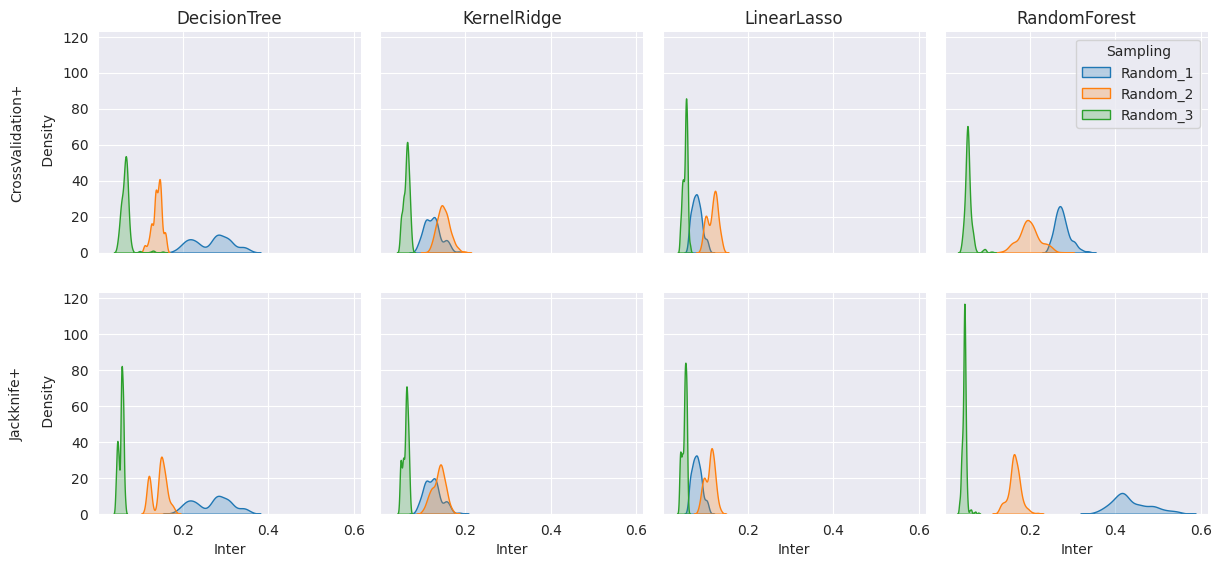

In [8]:
# Erstelle das Facet Grid
g = sns.FacetGrid(df_exploded, row='Methode', col='Modell', hue="Strategie")
g.map(sns.kdeplot, 'Inter', fill=True)


for ax, title in zip(g.axes.flat, df_exploded['Modell'].unique()):
    ax.set_title(rename_strings(title))

# Linke Beschriftungen anpassen
for ax, row_val in zip(g.axes[:, 0], df_exploded['Methode'].unique()):
    ax.set_ylabel(f"{rename_strings(row_val)}\n\n Density")

# Remove titles for all but the first row
for ax in g.axes[1:, :].flatten():
    ax.set_title('')

for ax in g.axes[0, 1:]:
    ax.set_ylabel("")

for ax in g.axes[1, 1:]:
    ax.set_ylabel("")

# Passe das Layout an
plt.subplots_adjust(top=0.9)
plt.legend(title='Sampling', bbox_to_anchor=(0.5, 2.15), loc='upper left', borderaxespad=0., frameon=True)
g.savefig(os.path.join(exp_path, "random-com-grid-inter"), bbox_inches='tight')
# Zeige die Grafik an
plt.show()

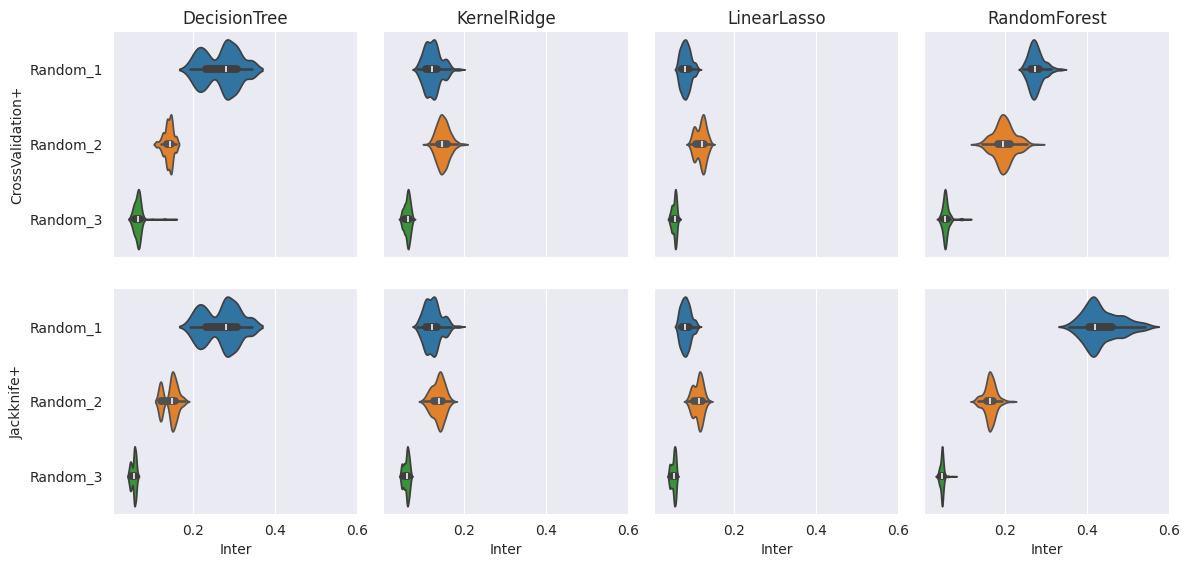

In [12]:
# Erstelle das Facet Grid
g = sns.FacetGrid(df_exploded, row='Methode', col='Modell', hue="Strategie")
g.map_dataframe(sns.violinplot, x='Inter', y="Strategie", fill=True)


for ax, title in zip(g.axes.flat, df_exploded['Modell'].unique()):
    ax.set_title(rename_strings(title))

# Linke Beschriftungen anpassen
for ax, row_val in zip(g.axes[:, 0], df_exploded['Methode'].unique()):
    ax.set_ylabel(f"{rename_strings(row_val)}")

# Remove titles for all but the first row
for ax in g.axes[1:, :].flatten():
    ax.set_title('')

for ax in g.axes[0, 1:]:
    ax.set_ylabel("")

for ax in g.axes[1, 1:]:
    ax.set_ylabel("")

# Passe das Layout an
plt.subplots_adjust(top=0.9)
#plt.legend(title='Sampling', bbox_to_anchor=(0.5, 2.15), loc='upper left', borderaxespad=0., frameon=True)
g.savefig(os.path.join(exp_path, "random-com-grid-inter"), bbox_inches='tight')
# Zeige die Grafik an
plt.show()